<a href="https://colab.research.google.com/github/aditiraja/Data-Science-Society/blob/master/Mental%20Health%20In%20Tech%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

read_file = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')
read_file.drop(read_file[ read_file['Are you self-employed?'] == 1 ].index, inplace=True)
read_file.drop(['Are you self-employed?', 'Is your employer primarily a tech company/organization?',
                'Is your primary role within your company related to tech/IT?',
                'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?',
                'Do you know local or online resources to seek help for a mental health disorder?',
                'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
                'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?',
                'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
                'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?',
                'Do you believe your productivity is ever affected by a mental health issue?',
                'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
                'Do you have previous employers?', 'Have your previous employers provided mental health benefits?',
                'Were you aware of the options for mental health care provided by your previous employers?',
                'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',
                'Did your previous employers provide resources to learn more about mental health issues and how to seek help?',
                'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
                'Do you think that discussing a mental health disorder with previous employers would have negative consequences?',
                'Do you think that discussing a physical health issue with previous employers would have negative consequences?',
                'Would you have been willing to discuss a mental health issue with your previous co-workers?',
                'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?',
                'Did you feel that your previous employers took mental health as seriously as physical health?',
                'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?'], axis=1, inplace=True)
read_file.drop(['Which of the following best describes your work position?'], axis=1, inplace=True)
read_file

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,"If yes, what condition(s) have you been diagnosed with?","If maybe, what condition(s) do you believe you have?",Have you been diagnosed with a mental health condition by a medical professional?,"If so, what condition(s) were you diagnosed with?",Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Do you work remotely?
0,26-100,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,NaN,Maybe,NaN,Maybe,NaN,Maybe,"No, I don't think they would",Somewhat open,No,NaN,No,Yes,No,NaN,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",0,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Sometimes
1,6-25,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,NaN,Maybe,It would depend on the health issue. If there ...,No,While mental health has become a more prominen...,"No, I don't think it would","No, I don't think they would",Somewhat open,No,NaN,Yes,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Never
2,6-25,No,NaN,No,No,I don't know,Neither easy nor difficult,

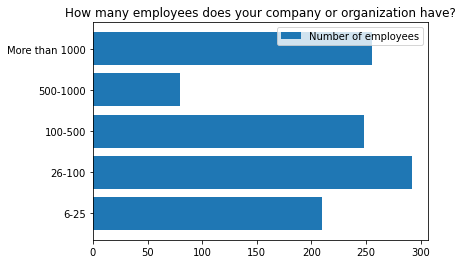

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

bar_1 = pd.read_csv('mental-heath-in-tech-2016_20161114.csv', usecols = ['How many employees does your company or organization have?'])
bar_1.dropna(inplace=True)


employees = ["6-25", "26-100", "100-500", "500-1000", "More than 1000"]
count = [0, 0, 0, 0, 0]
for val in bar_1.values:
    if (val == "6-25"):
        count[0] = count[0] + 1
    elif (val == "26-100"):
        count[1] = count[1] + 1
    elif (val == "100-500"):
        count[2] = (count[2] + 1)
    elif (val == "500-1000"):
        count[3] = (count[3] + 1)
    elif (val == "More than 1000"):
        count[4] = (count[4] + 1)

fig, ax = plt.subplots()
ax.barh( employees, count, label="Number of employees")
ax.legend()
plt.title("How many employees does your company or organization have?")
plt.show()


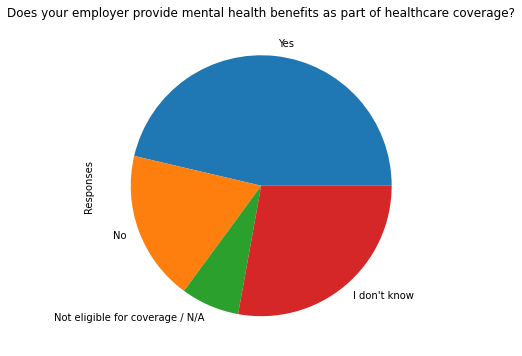

In [ ]:
bar_2 = pd.read_csv('mental-heath-in-tech-2016_20161114.csv', usecols = ['Does your employer provide mental health benefits as part of healthcare coverage?'])
bar_2.dropna(inplace=True)


responses = ["Yes", "No", "Not eligible for coverage / N/A", "I don't know"]
count = [0, 0, 0, 0]
for val in bar_2.values:
    if (val == "Yes"):
        count[0] = count[0] + 1
    elif (val == "No"):
        count[1] = count[1] + 1
    elif (val == "Not eligible for coverage / N/A"):
        count[2] = (count[2] + 1)
    elif (val == "I don't know"):
        count[3] = (count[3] + 1)

series = pd.Series(count, 
                   index=responses, 
                   name='Responses')
series.plot.pie(figsize=(6, 6), title="Does your employer provide mental health benefits as part of healthcare coverage?")


*italicized text*# New Section

In [ ]:
comfortable = "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?"
gender = "What is your gender?"
selecting_relevant_columns = read_file[[comfortable, gender]]
selecting_relevant_columns.replace(to_replace=['Yes', 'Maybe', 'No'],
           value= [1, 0.5, 0], 
           inplace=True)
selecting_relevant_columns.replace(to_replace=['male', 'M', 'm', 'female', 'f', 'F', 'woman'],
           value= ['Male', 'Male','Male', 'Female', 'Female', 'Female','Female'], 
           inplace=True)
male = selecting_relevant_columns[(selecting_relevant_columns[comfortable] != 0.5) & (selecting_relevant_columns[gender] == "Male")]
female = selecting_relevant_columns[(selecting_relevant_columns[comfortable] != 0.5) & (selecting_relevant_columns[gender] == "Female")]
selecting_relevant_columns = pd.concat([male, female])
selecting_relevant_columns

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,What is your gender?
0,1.0,Male
1,1.0,Male
5,1.0,Male
6,1.0,Male
10,1.0,Male
...,...,...
1411,0.0,Female
1413,1.0,Female
1415,0.0,Female
1427,1.0,Female


In [ ]:
comfort_and_male = selecting_relevant_columns[(selecting_relevant_columns[comfortable] == 1.0) & (selecting_relevant_columns[gender] == "Male")]
comfort_and_male

,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,What is your gender?
0,1.0,Male
1,1.0,Male
5,1.0,Male
6,1.0,Male
10,1.0,Male
...,...,...
1402,1.0,Male
1403,1.0,Male
1409,1.0,Male
1425,1.0,Male


In [ ]:
comfort_and_female = selecting_relevant_columns[(selecting_relevant_columns[comfortable] == 1.0) & (selecting_relevant_columns[gender] == "Female")]
comfort_and_female

,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,What is your gender?
7,1.0,Female
12,1.0,Female
94,1.0,Female
99,1.0,Female
117,1.0,Female
...,...,...
1387,1.0,Female
1400,1.0,Female
1413,1.0,Female
1427,1.0,Female


In [ ]:
uncomfort_and_male = selecting_relevant_columns[(selecting_relevant_columns[comfortable] == 0.0) & (selecting_relevant_columns[gender] == "Male")]
uncomfort_and_male

,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,What is your gender?
11,0.0,Male
19,0.0,Male
22,0.0,Male
26,0.0,Male
27,0.0,Male
...,...,...
1407,0.0,Male
1410,0.0,Male
1417,0.0,Male
1418,0.0,Male


In [ ]:
uncomfort_and_female = selecting_relevant_columns[(selecting_relevant_columns[comfortable] == 0.0) & (selecting_relevant_columns[gender] == "Female")]
uncomfort_and_female

,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,What is your gender?
4,0.0,Female
106,0.0,Female
126,0.0,Female
138,0.0,Female
162,0.0,Female
...,...,...
1378,0.0,Female
1386,0.0,Female
1392,0.0,Female
1411,0.0,Female


In [ ]:
num_rows_in_df = selecting_relevant_columns.shape[0]

In [ ]:
#i added the df argument because errors were occuring from the repetition of names
def difference_in_proportion(df):
    male_counts = len(df[(df[comfortable] == 1.0) & (df[gender] == "Male")].index)
    female_counts = len(df[(selecting_relevant_columns[comfortable] == 1.0) & (df[gender] == "Female")].index)
    male_proportion = male_counts/(male_counts+len(df[(df[comfortable] == 0.0) & (df[gender] == "Male")].index))
    female_proportion = female_counts/(female_counts+len(df[(df[comfortable] == 0.0) & (df[gender] == "Female")].index))
    return abs(female_proportion - male_proportion)

In [ ]:
observed_diff_proportion = difference_in_proportion(selecting_relevant_columns)
observed_diff_proportion

0.007655595387206837

In [ ]:
def simulate_one_stat():
    #shuffling the entire dataframe w/o replacement; we were missing the "n = " argument earlier, 
    #so it was only returning one row
    shuffled_gender_df = selecting_relevant_columns.sample(n=num_rows_in_df, replace=False)
    
    #extracting the array of the gender column from our shuffled table and turning it into a list 
    #for purposes of creating a new table (further explanied below)
    shuffled_gender_df_list = shuffled_gender_df[gender].tolist()
    
    #dropping our old, unshuffled gender column
    new_df = selecting_relevant_columns.drop(columns = [gender])
    
    #adding our new, shuffled gender column; we used .tolist() earlier because we need to pass in a list for this
    #way of adding a new column 
    new_df[gender] = shuffled_gender_df_list
    return difference_in_proportion(new_df)

In [ ]:
trials = 1000
test_stats = []
 
for i in np.arange(trials):
    test_stats = np.append(test_stats, simulate_one_stat())
 
p_value_ab = (np.count_nonzero(test_stats >= observed_diff_proportion)) / trials
p_value_ab

0.935

In [ ]:
comfortable = "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?"
size = "How many employees does your company or organization have?"

selecting_relevant_columns_2 = read_file[[comfortable, size]]
selecting_relevant_columns_2.replace(to_replace=['Yes', 'Maybe', 'No'],
           value= [1, 0.5, 0], 
           inplace=True)
selecting_relevant_columns_2.replace(to_replace=['6-25', '26-100', '100-500', '500-1000', 'More than 1000'],
           value= ['Small', 'Small','Small', 'Large', 'Large'], 
           inplace=True)
small = selecting_relevant_columns_2[(selecting_relevant_columns_2[comfortable] != 0.5) & (selecting_relevant_columns_2[size] == "Small")]
large = selecting_relevant_columns_2[(selecting_relevant_columns_2[comfortable] != 0.5) & (selecting_relevant_columns_2[size] == "Large")]
selecting_relevant_columns_2 = pd.concat([small, large])
selecting_relevant_columns_2

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,How many employees does your company or organization have?
0,1.0,Small
1,1.0,Small
4,0.0,Small
6,1.0,Small
10,1.0,Small
...,...,...
1401,1.0,Large
1405,0.0,Large
1415,0.0,Large
1419,0.0,Large


In [ ]:
num_rows_in_df_2 = selecting_relevant_columns_2.shape[0]

In [ ]:
#i added the df argument because errors were occuring from the repetition of names
def difference_in_proportion_2(df):
    small_counts = len(df[(df[comfortable] == 1.0) & (df[size] == "Small")].index)
    large_counts = len(df[(selecting_relevant_columns_2[comfortable] == 1.0) & (df[size] == "Large")].index)
    small_proportion = small_counts/(small_counts+len(df[(df[comfortable] == 0.0) & (df[size] == "Small")].index))
    large_proportion = large_counts/(large_counts+len(df[(df[comfortable] == 0.0) & (df[size] == "Large")].index))
    return small_proportion - large_proportion

In [ ]:
observed_diff_proportion_2 = difference_in_proportion_2(selecting_relevant_columns_2)
observed_diff_proportion_2

0.0867736491011869

In [ ]:
def simulate_one_stat_2():
    #shuffling the entire dataframe w/o replacement; we were missing the "n = " argument earlier, 
    #so it was only returning one row
    shuffled_size_df = selecting_relevant_columns_2.sample(n=num_rows_in_df_2, replace=False)
    
    #extracting the array of the size column from our shuffled table and turning it into a list 
    #for purposes of creating a new table (further explained below)
    shuffled_size_df_list = shuffled_size_df[size].tolist()
    
    #dropping our old, unshuffled size column
    new_df = selecting_relevant_columns_2.drop(columns = [size])
    
    #adding our new, shuffled size column; we used .tolist() earlier because we need to pass in a list for this
    #way of adding a new column 
    new_df[size] = shuffled_size_df_list
    return difference_in_proportion_2(new_df)

In [ ]:
trials = 1000
test_stats_2 = []
 
for i in np.arange(trials):
    test_stats_2 = np.append(test_stats_2, simulate_one_stat_2())
 
p_value_ab_2 = (np.count_nonzero(test_stats_2 >= observed_diff_proportion_2)) / trials
p_value_ab_2

0.015